In [5]:
# === Bootstrap Kedro desde el notebook ===
from pathlib import Path
import os, sys

root = Path.cwd()
while not (root / "pyproject.toml").exists() and root.parent != root:
    root = root.parent

os.chdir(root)
sys.path.append(str(root / "src"))

from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

bootstrap_project(str(root))
session = KedroSession.create(str(root))
context = session.load_context()
catalog = context.catalog
params = context.params

print("CWD:", Path.cwd())
from proyecto_ml.pipeline_registry import register_pipelines
pipes = register_pipelines()
print("Kedro OK — pipelines:", list(pipes))



[09/24/25 20:48:47] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=874582;file://c:\Users\Roxana\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=734161;file://c:\Users\Roxana\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

CWD: c:\Users\Roxana\proyecto-ml
Kedro OK — pipelines: ['__default__', 'dataprep', 'data_science']


[09/24/25 20:49:32] INFO     Loading data from diabetes_X_train (ParquetDataset)...            ]8;id=845884;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=463377;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/24/25 20:49:33] INFO     Loading data from diabetes_X_test (ParquetDataset)...             ]8;id=839993;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=437998;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from diabetes_y_train (ParquetDataset)...            ]8;id=516305;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=741972;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from diabetes_y_test (ParquetDataset)...             ]8;id=496636;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=85813;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


### DIABETES ###
X_train: (6400, 14) | X_test: (1600, 14)
y_train: (6400, 1) | y_test: (1600, 1)

Balance y_train:
Tipo_Diabetes
Tipo 2         3184
No diabetes    1997
Tipo 1         1067
Gestacional     152
Name: count, dtype: Int64
Tipo_Diabetes
Tipo 2         49.75%
No diabetes     31.2%
Tipo 1         16.67%
Gestacional     2.38%
Name: proportion, dtype: object

Balance y_test:
Tipo_Diabetes
Tipo 2         793
No diabetes    520
Tipo 1         242
Gestacional     45
Name: count, dtype: Int64
Tipo_Diabetes
Tipo 2         49.56%
No diabetes     32.5%
Tipo 1         15.12%
Gestacional     2.81%
Name: proportion, dtype: object


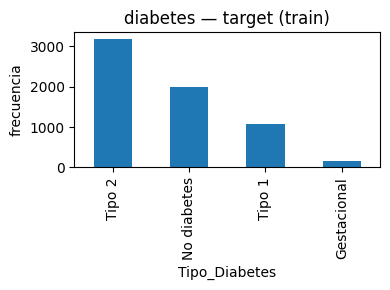

✓ Guardado: data\08_reporting\diabetes_target_train.png


                    INFO     Loading data from cardio_X_train (ParquetDataset)...              ]8;id=625000;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=368487;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[09/24/25 20:49:34] INFO     Loading data from cardio_X_test (ParquetDataset)...               ]8;id=564027;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=288719;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardio_y_train (ParquetDataset)...              ]8;id=323281;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=249801;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardio_y_test (ParquetDataset)...               ]8;id=147815;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=211573;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


### CARDIO ###
X_train: (6400, 16) | X_test: (1600, 16)
y_train: (6400, 1) | y_test: (1600, 1)

Balance y_train:
Riesgo_Cardiovascular
Bajo        2977
Alto        1620
Moderado    1139
Muy Alto     664
Name: count, dtype: Int64
Riesgo_Cardiovascular
Bajo        46.52%
Alto        25.31%
Moderado     17.8%
Muy Alto    10.38%
Name: proportion, dtype: object

Balance y_test:
Riesgo_Cardiovascular
Bajo        712
Alto        424
Moderado    276
Muy Alto    188
Name: count, dtype: Int64
Riesgo_Cardiovascular
Bajo         44.5%
Alto         26.5%
Moderado    17.25%
Muy Alto    11.75%
Name: proportion, dtype: object


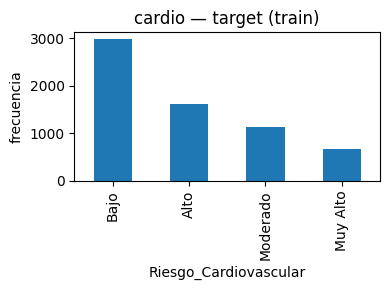

✓ Guardado: data\08_reporting\cardio_target_train.png


                    INFO     Loading data from cardiabetes_X_train (ParquetDataset)...         ]8;id=992098;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=943219;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_X_test (ParquetDataset)...          ]8;id=250537;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=924835;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_y_train (ParquetDataset)...         ]8;id=116618;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=537744;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

                    INFO     Loading data from cardiabetes_y_test (ParquetDataset)...          ]8;id=96117;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=696223;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\


### CARDIABETES ###
X_train: (12759, 18) | X_test: (3190, 18)
y_train: (12759, 1) | y_test: (3190, 1)

Balance y_train:
Diabetes
0    6501
1    6258
Name: count, dtype: int64
Diabetes
0    50.95%
1    49.05%
Name: proportion, dtype: object

Balance y_test:
Diabetes
0    1626
1    1564
Name: count, dtype: int64
Diabetes
0    50.97%
1    49.03%
Name: proportion, dtype: object


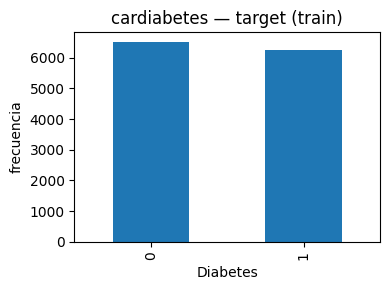

✓ Guardado: data\08_reporting\cardiabetes_target_train.png


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

REPORT_DIR = Path("data/08_reporting")
REPORT_DIR.mkdir(parents=True, exist_ok=True)

def check_split(base: str):
    X_train = catalog.load(f"{base}_X_train")
    X_test  = catalog.load(f"{base}_X_test")
    y_train = catalog.load(f"{base}_y_train")
    y_test  = catalog.load(f"{base}_y_test")
    
    print(f"\n### {base.upper()} ###")
    print("X_train:", X_train.shape, "| X_test:", X_test.shape)
    print("y_train:", y_train.shape, "| y_test:", y_test.shape)

    # Valor y distribución del target
    if isinstance(y_train, pd.DataFrame) and y_train.shape[1] == 1:
        ytr = y_train.iloc[:,0]
        yte = y_test.iloc[:,0]
    else:
        ytr = y_train.squeeze()
        yte = y_test.squeeze()

    print("\nBalance y_train:")
    print(ytr.value_counts())
    print((ytr.value_counts(normalize=True)*100).round(2).astype(str)+"%")

    print("\nBalance y_test:")
    print(yte.value_counts())
    print((yte.value_counts(normalize=True)*100).round(2).astype(str)+"%")

    # Guarda gráfico de distribución del target train
    ax = ytr.value_counts().plot(kind="bar", title=f"{base} — target (train)", figsize=(4,3))
    ax.set_ylabel("frecuencia")
    plt.tight_layout()
    out = REPORT_DIR / f"{base}_target_train.png"
    plt.savefig(out, dpi=150)
    plt.show()
    print("✓ Guardado:", out)

for base in ["diabetes","cardio","cardiabetes"]:
    check_split(base)


In [24]:
# Asegúrate de estar en la raíz del proyecto (donde está pyproject.toml)
import os, pathlib, glob

def goto_project_root():
    here = pathlib.Path.cwd()
    for _ in range(5):
        if (here / "pyproject.toml").exists():
            os.chdir(here); return str(here)
        here = here.parent
    raise SystemExit("❌ Abre Jupyter desde la carpeta del proyecto (donde está pyproject.toml).")

print("ROOT:", goto_project_root())
print("conf/base:", glob.glob("conf/base/*.*")[:5])

from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession
bootstrap_project(".")
session = KedroSession.create(".")
context = session.load_context()
catalog = context.catalog
params  = context.params

# Parquet engine
try:
    import pyarrow  # noqa
    print("pyarrow OK")
except Exception:
    print("⚠️ Instala pyarrow:  python -m pip install pyarrow")

print("Datasets en catálogo:", sorted(list(catalog)))


ROOT: c:\Users\Roxana\proyecto-ml
conf/base: ['conf/base\\catalog.yml', 'conf/base\\parameters.yml', 'conf/base\\parameters_data_processing.yml', 'conf/base\\parameters_data_science.yml', 'conf/base\\parameters_reporting.yml']


[09/24/25 12:24:56] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=827537;file://c:\Users\Roxana\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=138037;file://c:\Users\Roxana\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

pyarrow OK
Datasets en catálogo: ['cardiabetes_clean', 'cardiabetes_features', 'cardiabetes_hists_plot', 'cardiabetes_raw', 'cardiabetes_target_plot', 'cardio_clean', 'cardio_features', 'cardio_hists_plot', 'cardio_raw', 'cardio_target_plot', 'diabetes_clean', 'diabetes_features', 'diabetes_hists_plot', 'diabetes_raw', 'diabetes_target_plot', 'parameters', 'params:model_options', 'params:model_options.features', 'params:model_options.random_state', 'params:model_options.test_size', 'params:preprocessing', 'params:preprocessing.categorical_encoding', 'params:preprocessing.imputer_strategy_cat', 'params:preprocessing.imputer_strategy_num', 'params:preprocessing.scaler', 'params:quality', 'params:quality.iqr_factor', 'params:reporting_names', 'params:reporting_names.cardiabetes', 'params:reporting_names.cardio', 'params:reporting_names.diabetes', 'params:split', 'params:split.random_state', 'params:split.test_size', 'params:targets', 'params:targets.cardiabetes', 'params:targets.cardio', 

In [25]:
import pandas as pd
import numpy as np

def normalize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns.astype(str)
        .str.strip()
        .str.replace(r"\s+", "_", regex=True)
        .str.replace("[^0-9a-zA-Z_]", "", regex=True)
    )
    return df

def coerce_numeric(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    for c in out.columns:
        if out[c].dtype == "object":
            try:
                out[c] = pd.to_numeric(out[c].str.replace(",", ".", regex=False), errors="ignore")
            except Exception:
                pass
    return out

def to_bool01(s: pd.Series) -> pd.Series:
    m = {"yes":1,"y":1,"true":1,"t":1,"si":1,"sí":1,"1":1,
         "no":0,"n":0,"false":0,"f":0,"0":0}
    if s.dtype=="object":
        return s.astype(str).str.strip().str.lower().map(m).where(lambda x: x.isin([0,1]), s)
    return s

def basic_clean(df: pd.DataFrame) -> pd.DataFrame:
    before = len(df)
    df = normalize_columns(df)
    df = df.drop_duplicates().copy()
    dups = before - len(df)
    obj_like = df.select_dtypes(include=["object","string"]).columns
    for c in obj_like:
        df[c] = df[c].astype("string").str.strip().replace({"": pd.NA})
    df = coerce_numeric(df)
    print(f"  · Duplicados eliminados: {dups} | Nulos totales: {int(df.isna().sum().sum())}")
    return df

def iqr_clip(df: pd.DataFrame, factor: float = 3.0) -> pd.DataFrame:
    out = df.copy()
    num = out.select_dtypes(include=np.number).columns
    for c in num:
        q1, q3 = out[c].quantile(0.25), out[c].quantile(0.75)
        iqr = q3 - q1
        low, high = q1 - factor*iqr, q3 + factor*iqr
        out[c] = out[c].clip(lower=low, upper=high)
    return out

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    lower = {c.lower(): c for c in df.columns}
    # BMI si hay weight/height (en kg/cm)
    if "weight" in lower and "height" in lower:
        w, h = lower["weight"], lower["height"]
        with np.errstate(divide="ignore", invalid="ignore"):
            df["bmi"] = df[w] / ((df[h]/100) ** 2)
    # age_bin si existe alguna variante de edad
    age_col = next((a for a in ["age","edad","Age","Edad"] if a in df.columns), None)
    if age_col:
        bins = [-np.inf, 30, 45, 60, np.inf]; labels = ["<=30","31-45","46-60","60+"]
        df["age_bin"] = pd.cut(pd.to_numeric(df[age_col], errors="coerce"), bins=bins, labels=labels)
    return df

def build_features(df: pd.DataFrame, target: str) -> pd.DataFrame:
    df = df.copy()
    df[target] = to_bool01(df[target])  # normaliza binario si venía como texto
    cat_cols = [c for c in df.columns if c != target and df[c].dtype == "object" and df[c].nunique() <= 20]
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype="int8")
    return df


In [26]:
def ensure_diabetes_target(df: pd.DataFrame):
    df = df.copy()
    for col in ["Diabetes","Outcome"]:
        if col in df.columns and pd.Series(df[col]).dropna().nunique() == 2:
            return df, col
    if "HbA1c" in df.columns:
        df["Diabetes_proxy"] = (pd.to_numeric(df["HbA1c"], errors="coerce") >= 6.5).astype("int8")
        return df, "Diabetes_proxy"
    raise ValueError("No hay 'Diabetes'/'Outcome' ni 'HbA1c' para crear proxy en diabetes.")

def ensure_cardio_target(df: pd.DataFrame):
    df = df.copy()
    if "Riesgo_Cardiovascular" in df.columns:
        df["Riesgo_Alto"] = df["Riesgo_Cardiovascular"].astype(str).str.lower().eq("alto").astype("int8")
        return df, "Riesgo_Alto"
    if "Diabetes" in df.columns and pd.Series(df["Diabetes"]).dropna().nunique() == 2:
        return df, "Diabetes"
    # Proxy por PA/colesterol/glucosa
    cols = {c.lower(): c for c in df.columns}
    ap_hi = next((cols[k] for k in ["ap_hi","systolic","tas","sistolica","sistólica","pas"] if k in cols), None)
    ap_lo = next((cols[k] for k in ["ap_lo","diastolic","tad","diastolica","diastólica","pad"] if k in cols), None)
    chol  = next((cols[k] for k in ["cholesterol","colesterol","chol","colesterol_total"] if k in cols), None)
    gluc  = next((cols[k] for k in ["glucose","glucosa","gluc"] if k in cols), None)
    conds = []
    if ap_hi is not None: conds.append(pd.to_numeric(df[ap_hi], errors="coerce") >= 140)
    if ap_lo is not None: conds.append(pd.to_numeric(df[ap_lo], errors="coerce") >= 90)
    if chol  is not None: conds.append(pd.to_numeric(df[chol ], errors="coerce") >= 240)
    if gluc  is not None: conds.append(pd.to_numeric(df[gluc ], errors="coerce") >= 126)
    if conds:
        proxy = conds[0]
        for c in conds[1:]: proxy = proxy | c
        df["cardio_proxy"] = proxy.astype("int8")
        return df, "cardio_proxy"
    raise ValueError("No pude crear target para cardio.")

def ensure_cardiabetes_target(df: pd.DataFrame):
    df = df.copy()
    if "Diabetes" in df.columns and pd.Series(df["Diabetes"]).dropna().nunique() == 2:
        return df, "Diabetes"
    if "Riesgo_Cardiovascular" in df.columns:
        df["Riesgo_Alto"] = df["Riesgo_Cardiovascular"].astype(str).str.lower().eq("alto").astype("int8")
        return df, "Riesgo_Alto"
    if "HbA1c" in df.columns:
        df["Diabetes_proxy"] = (pd.to_numeric(df["HbA1c"], errors="coerce") >= 6.5).astype("int8")
        return df, "Diabetes_proxy"
    raise ValueError("No se encontró target utilizable en cardiabetes.")


In [27]:
def prep_dataset(dataset_key: str, raw_name: str, clean_name: str, feats_name: str):
    print(f"\n▶ {dataset_key.upper()}: {raw_name} → {clean_name} / {feats_name}")

    df_raw = catalog.load(raw_name)
    df_clean = basic_clean(df_raw)
    df_clean = iqr_clip(df_clean, factor=3.0)
    df_feat  = engineer_features(df_clean)

    if dataset_key == "diabetes":
        df_feat, y_col = ensure_diabetes_target(df_feat)
    elif dataset_key == "cardio":
        df_feat, y_col = ensure_cardio_target(df_feat)
    elif dataset_key == "cardiabetes":
        df_feat, y_col = ensure_cardiabetes_target(df_feat)
    else:
        raise ValueError(f"dataset_key desconocido: {dataset_key}")
    print(f"  · Target: {y_col}")

    df_features = build_features(df_feat, y_col)

    if clean_name in catalog:
        catalog.save(clean_name, df_clean); print(f"  ✓ Guardado {clean_name}")
    else:
        print(f"  [skip] {clean_name} no está en catalog.yml")

    if feats_name in catalog:
        catalog.save(feats_name, df_features); print(f"  ✓ Guardado {feats_name}")
    else:
        print(f"  [skip] {feats_name} no está en catalog.yml")

    print("  · Shapes → clean:", df_clean.shape, "| features:", df_features.shape)
    return df_clean, df_features, y_col

results = {}
results["diabetes"] = prep_dataset("diabetes", "diabetes_raw", "diabetes_clean", "diabetes_features")
results["cardio"]   = prep_dataset("cardio", "cardio_raw", "cardio_clean", "cardio_features")
results["cardiabetes"] = prep_dataset("cardiabetes", "cardiabetes_raw", "cardiabetes_clean", "cardiabetes_features")



▶ DIABETES: diabetes_raw → diabetes_clean / diabetes_features


[09/24/25 12:25:23] INFO     Loading data from diabetes_raw (CSVDataset)...                    ]8;id=571196;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=69262;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

  · Duplicados eliminados: 0 | Nulos totales: 0
  · Target: Diabetes_proxy


                    INFO     Saving data to diabetes_clean (ParquetDataset)...                 ]8;id=843588;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=29003;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado diabetes_clean


                    INFO     Saving data to diabetes_features (ParquetDataset)...              ]8;id=908687;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=428434;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado diabetes_features
  · Shapes → clean: (8000, 14) | features: (8000, 16)

▶ CARDIO: cardio_raw → cardio_clean / cardio_features


                    INFO     Loading data from cardio_raw (CSVDataset)...                      ]8;id=508400;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=517751;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

  · Duplicados eliminados: 0 | Nulos totales: 0
  · Target: Riesgo_Alto


                    INFO     Saving data to cardio_clean (ParquetDataset)...                   ]8;id=803923;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=804138;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado cardio_clean


                    INFO     Saving data to cardio_features (ParquetDataset)...                ]8;id=697008;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=430108;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado cardio_features
  · Shapes → clean: (8000, 16) | features: (8000, 18)

▶ CARDIABETES: cardiabetes_raw → cardiabetes_clean / cardiabetes_features


                    INFO     Loading data from cardiabetes_raw (CSVDataset)...                 ]8;id=141879;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=631919;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

  · Duplicados eliminados: 0 | Nulos totales: 0
  · Target: Diabetes


                    INFO     Saving data to cardiabetes_clean (ParquetDataset)...              ]8;id=597910;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=77851;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado cardiabetes_clean


                    INFO     Saving data to cardiabetes_features (ParquetDataset)...           ]8;id=427460;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=158640;file://c:\Users\Roxana\venv\Lib\site-packages\kedro\io\data_catalog.py#1006\1006]8;;\

  ✓ Guardado cardiabetes_features
  · Shapes → clean: (15949, 18) | features: (15949, 19)


In [28]:
from IPython.display import display

for key, (df_clean, df_features, y_col) in results.items():
    print(f"\n=== {key.upper()} ===  target='{y_col}'")
    # Calidad básica
    print("CLEAN:", df_clean.shape, "| nulos totales:", int(df_clean.isna().sum().sum()), "| duplicados:", df_clean.duplicated().sum())
    print("FEATS:", df_features.shape, "| nulos totales:", int(df_features.isna().sum().sum()))
    # Balance del target
    vc = df_features[y_col].value_counts(dropna=False)
    print("Distribución target:", {int(k) if pd.notna(k) else 'NaN': int(v) for k,v in vc.items()})
    display(df_features.head(3))



=== DIABETES ===  target='Diabetes_proxy'
CLEAN: (8000, 14) | nulos totales: 0 | duplicados: 0
FEATS: (8000, 16) | nulos totales: 0
Distribución target: {1: 4497, 0: 3503}


,Edad,Cuartil_Edad,Sexo,Tipo_Diabetes,IMC,HbA1c,Insulina,Colesterol_Total,LDL,HDL,Trigliceridos,PAS,PAD,Registro,age_bin,Diabetes_proxy
0,43,Q2,Mujer,Tipo 2,36.7,8.52,194.12,222.24,129.79,47.16,167.35,149.8,94.3,2017,31-45,1
1,67,Q4,Mujer,Tipo 1,30.0,6.94,0.00,217.42,121.33,60.05,122.24,152.7,85.0,2013,60+,1
2,55,Q3,Mujer,Tipo 2,34.7,6.20,100.56,219.90,132.84,54.86,136.30,155.3,93.7,2015,46-60,0



=== CARDIO ===  target='Riesgo_Alto'
CLEAN: (8000, 16) | nulos totales: 0 | duplicados: 0
FEATS: (8000, 18) | nulos totales: 0
Distribución target: {0: 5956, 1: 2044}


,Ao_Registro,Edad,Sexo,Comunidad_Autonoma,Riesgo_Cardiovascular,Actividad_Fisica,Tramo_Edad,Ingresos_Anuales,Nivel_Estres,Consumo_Alcohol,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,age_bin,Riesgo_Alto
0,2016,53,Hombre,Cataluña,Bajo,Moderado,45-54,24665.24,Alto,No consume,30.464413,0,203.053597,228.381680,146.4,89.7,46-60,0
1,2013,66,Mujer,Cataluña,Bajo,Sedentario,65+,21693.89,Moderado,No consume,21.307639,0,214.198250,246.749168,151.8,87.2,60+,0
2,2017,68,Mujer,País Vasco,Bajo,Moderado,65+,15841.83,Moderado,No consume,32.672495,0,178.338545,214.823232,157.4,88.1,60+,0



=== CARDIABETES ===  target='Diabetes'
CLEAN: (15949, 18) | nulos totales: 0 | duplicados: 0
FEATS: (15949, 19) | nulos totales: 0
Distribución target: {0: 8127, 1: 7822}


,Ao_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes,age_bin
0,2016,53.0,30.464413,0,203.053597,228.381680,146.4,89.7,cardio,5.483777,10.602855,111.284292,71.456754,Alto,Moderado,Bajo,Hombre,No diabetes,46-60
1,2013,66.0,21.307639,0,214.198250,246.749168,151.8,87.2,cardio,5.212008,56.952216,124.064267,48.292897,Moderado,Sedentario,Bajo,Mujer,No diabetes,60+
2,2017,68.0,32.672495,0,178.338545,214.823232,157.4,88.1,cardio,6.750564,92.875636,123.757918,55.659980,Moderado,Moderado,Bajo,Mujer,Diabetes latente,60+
